In [33]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-23 20:26:59,405: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [116]:
provider = IBMQ.get_provider(group='open')
backend = Aer.get_backend('qasm_simulator')
backendReal = provider.get_backend('ibmq_ourense')

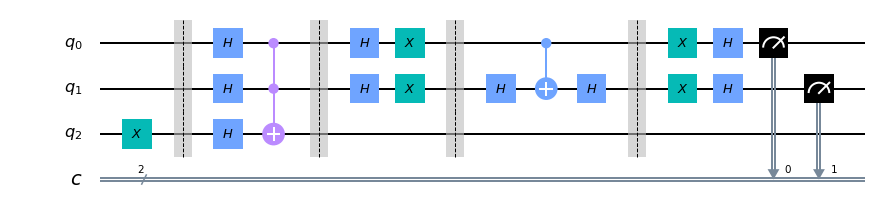

In [124]:
#obwód dla przykładu książkowego
circ = QuantumCircuit(3,2)
circ.x(2)
circ.barrier()
circ.h(0)
circ.h(1)
circ.h(2)

circ.ccx(0,1,2)

circ.barrier()

circ.h(0)
circ.h(1)

circ.x(0)
circ.x(1)

circ.barrier()

circ.h(1)
circ.cx(0,1)
circ.h(1)

circ.barrier()

circ.x(0)
circ.x(1)

circ.h(0)
circ.h(1)

circ.measure(0,0)
circ.measure(1,1)
circ.draw()

In [125]:
job = execute(circ, backend)
result = job.result()
counts = result.get_counts()

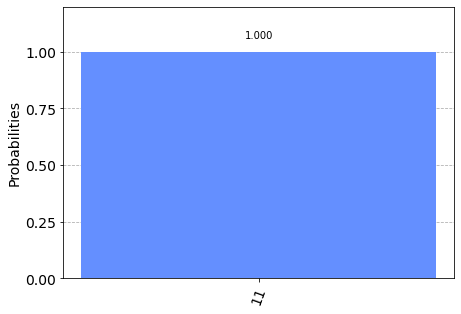

In [126]:
#wynik dla przykladu ksiazkowego przy wykorzystaniu symulatora
plot_histogram(counts)

In [127]:
jobReal = execute(circ, backendReal)
resultReal = jobReal.result()
countsReal = resultReal.get_counts()

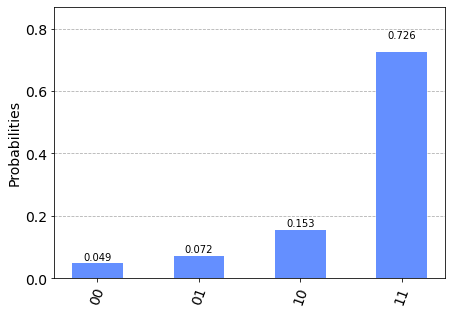

In [128]:
#wynik dla przykladu ksiazkowego przy wykorzystaniu prawdziwego komputera kwantowego
plot_histogram(countsReal)

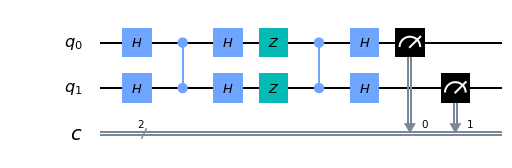

In [129]:
#obwód dla optymalizacja pod IBM
circ1 = QuantumCircuit(2,2)
circ1.h(0)
circ1.h(1)

circ1.cz(0,1)

circ1.h(0)
circ1.h(1)

circ1.z(0)
circ1.z(1)

circ1.cz(0,1)
circ1.h(0)
circ1.h(1)
circ1.measure(0,0)
circ1.measure(1,1)
circ1.draw()

In [130]:
job1 = execute(circ1, backend)
result1 = job1.result()
counts1 = result1.get_counts()

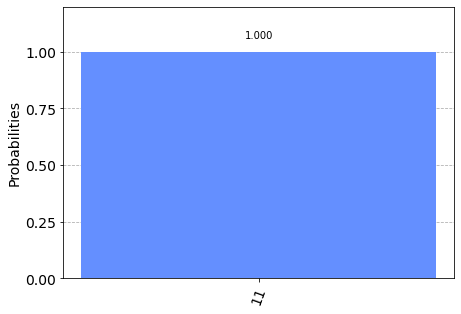

In [131]:
#wynik dla optymalizacji pod IBM przy wykorzystaniu symulatora
plot_histogram(counts1)

In [132]:
jobReal1 = execute(circ1, backendReal)
resultReal1 = jobReal1.result()
countsReal1 = resultReal1.get_counts()

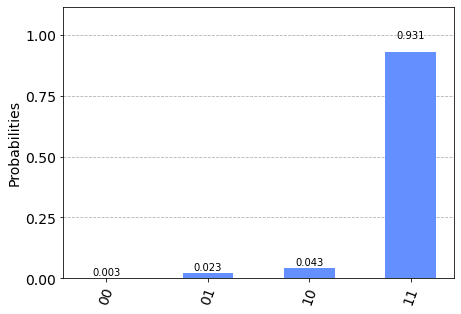

In [133]:
#wynik dla optymalizacji pod IBM przy wykorzystaniu prawdziwego komputera kwantowego
plot_histogram(countsReal1)

Dla obydwóch rozwiązań, nie można zaobserwować różnic w wynikach. Oba wyniki zawsze pokrywają się ze wzorem, który został skojarzony z wyrocznią. 
Różnice są zauważalne natomiast przy uruchomieniu obwodów dla prawdziwego komputera kwantowego. Można zaobserwować, że przy zoptymalizowanej wersji pod IBM, jakość wyniku jest wyższa, niż dla książkowego przypadku.  Wynika to z użycia mnniejszej ilości bramek w zoptymalizowanej wersji. W zoptymalizowanej wersji wykorzystano bramkę CZ zamiast bramki Toffoliego, dzięki czemu można było do obliczeń zredukować ilość użytych kabli.